In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sb
sb.set(style="whitegrid")

In [3]:
train = pd.read_csv('../Train/train_set_binary_encoding_sin_secondary_use.csv')

train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,position_b1,position_b0,plan_configuration_b3,plan_configuration_b2,plan_configuration_b1,plan_configuration_b0,legal_ownership_status_b2,legal_ownership_status_b1,legal_ownership_status_b0,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,1,0,0,0,0,1,0,0,1,3
1,8,900,2812,2,10,8,7,0,1,0,...,0,1,0,0,0,1,0,0,1,2
2,21,363,8973,2,10,5,5,0,1,0,...,1,0,0,0,0,1,0,0,1,3
3,22,418,10694,2,10,6,5,0,1,0,...,0,1,0,0,0,1,0,0,1,2
4,11,131,1488,3,30,8,9,1,0,0,...,0,1,0,0,0,1,0,0,1,3


In [4]:
X, y = train.iloc[:,:-1], train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

## Pruebas manuales

In [6]:
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=0)
xgb_model.fit(X_train,y_train)
preds = xgb_model.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F1-Mean Score: %f" % (f1))

/home/ben/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1-Mean Score: 0.733395


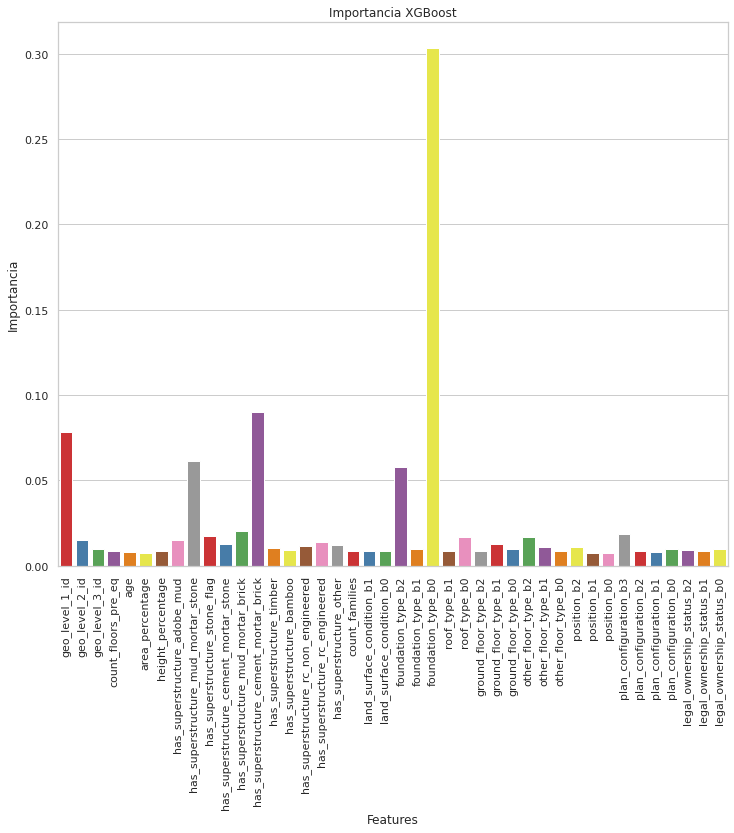

In [7]:
plt.figure(figsize=(12, 10))
sb.barplot(x=X_train.columns, y=xgb_model.feature_importances_, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia XGBoost')
plt.show()

## Test

In [7]:
test = pd.read_csv('../Test/test_set_binary_encoding_sin_secondary_use.csv')

test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,position_b2,position_b1,position_b0,plan_configuration_b3,plan_configuration_b2,plan_configuration_b1,plan_configuration_b0,legal_ownership_status_b2,legal_ownership_status_b1,legal_ownership_status_b0
0,300051,17,596,11307,3,20,7,6,0,1,...,0,0,1,0,0,0,1,0,0,1
1,99355,6,141,11987,2,25,13,5,0,1,...,0,0,1,0,0,0,1,0,0,1
2,890251,22,19,10044,2,5,4,5,0,1,...,0,0,1,0,0,0,1,0,0,1
3,745817,26,39,633,1,0,19,3,0,0,...,0,1,0,0,0,0,1,0,0,1
4,421793,17,289,7970,3,15,8,7,0,1,...,0,1,0,0,0,0,1,0,0,1


In [8]:
ids = test['building_id']

test.drop('building_id', axis='columns', inplace=True)

test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,position_b2,position_b1,position_b0,plan_configuration_b3,plan_configuration_b2,plan_configuration_b1,plan_configuration_b0,legal_ownership_status_b2,legal_ownership_status_b1,legal_ownership_status_b0
0,17,596,11307,3,20,7,6,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,6,141,11987,2,25,13,5,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,22,19,10044,2,5,4,5,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,26,39,633,1,0,19,3,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,17,289,7970,3,15,8,7,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [10]:
preds = xgb_model.predict(test)

In [11]:
test['damage_grade'] = preds
test['building_id'] = ids

result = test[['building_id', 'damage_grade']]

result.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3


In [12]:
result.to_csv('../preds_xgb_v2.csv', index=False)